In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url='https://www.sharesansar.com/gdp-market-capitalization'
r=requests.get(url)


In [3]:
htmlcontent=r.content
# htmlcontent

In [4]:
soup=BeautifulSoup(htmlcontent,'html.parser')
# print(soup.prettify)

In [5]:
table_data=soup.table
# print(table_data)

In [6]:
find_row=soup.find_all('tr')
# find_row

In [7]:
sharedetails=[]
for tag in find_row:
    y=tag.text.split('\n')
    sharedetails.append(y[1:])
# sharedetails    

In [8]:
# edited_value=[]
# for i in find_row:
#     i.replace(',','')
#     edited_value.append(i)
# edited_value    

In [9]:
import csv
file=open('stock.csv','w')
x=csv.writer(file)
x.writerows(sharedetails)
file.close()

In [10]:
import pandas as pd
df=pd.read_csv('stock.csv')
# df
plot1=df['Market Capitalization (in billions)'].dropna()
plot1

0        0.00
1    2,869.45
2    4,010.74
3    1,792.76
4    1,567.50
5    1,435.07
6    1,856.83
7    1,890.13
8      989.40
9    1,057.17
Name: Market Capitalization (in billions), dtype: object

In [11]:
plot2=df['GDP (in billions)'].dropna()
plot2

0    5,381.34
1    4,851.62
2    4,266.32
3    3,767.04
4    3,464.31
5    3,009.81
6    2,599.20
7    2,247.40
8    2,130.20
9    1,964.54
Name: GDP (in billions), dtype: object

In [12]:
cap=list(map(lambda x: (x.replace(',', '')), list(plot1)))
gdp=list(map(lambda x: (x.replace(',', '')), list(plot2)))

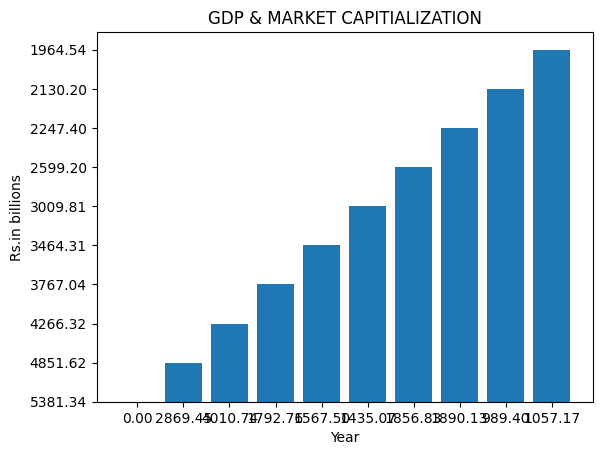

In [13]:
from matplotlib import pyplot as plt
plt.xlabel('Year')
plt.ylabel('Rs.in billions')
plt.title('GDP & MARKET CAPITIALIZATION')
plt.bar(cap,gdp)
plt.show()

In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Market capitalization', x=Market Capitalization (in billions), y=plot1),
    go.Bar(name='gdp in billions', x=Market Capitalization (in billions), y= plot2),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()